# Machine Learning
- polyfit
- nlinfit
- sklearn

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simple curve fitting via polyfit
A lot of times machine learning is just a fancy term for fitting a model. So let's start with a very simple model: polynomials.

In [3]:
x = np.linspace(-3, 3, 50)
y = x**2 +  np.random.rand(*x.shape)

In [4]:
p= np.polyfit(x, y, deg=2)
p

array([1.00346889, 0.01741276, 0.49128129])

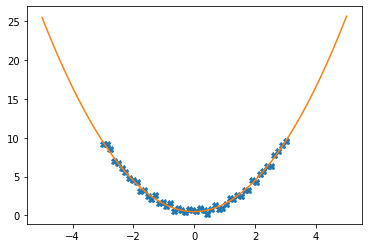

In [5]:
t = np.linspace(-5, 5, 100)

plt.plot(x, y, "X", label="data")
plt.plot(t, np.polyval(p, t), label="deg2 poly fit")

### Compare with higher orders
The tricky question when fitting polynomials is often which degree to use. Very often this comes down to using prior knowledge and [occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor): the simplest model (i.e. the lowest degree polynomial) that fits the data well is probably a good choice. 

Below I have added a 8th-degree polynomial fit to the picture. It porbably fits the data within quite well, but outside the data, it does terrible - which is not very surprising.

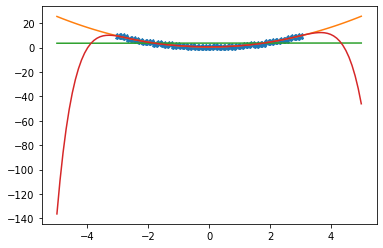

In [6]:
t = np.linspace(-5, 5, 100)

plt.plot(x, y, "X", label="data")
plt.plot(t, np.polyval(p, t), label="deg2 poly fit")

# add some other fits for comparison
plt.plot(t, np.polyval(np.polyfit(x, y, deg=1), t), label="deg1 poly fit")
plt.plot(t, np.polyval(np.polyfit(x, y, deg=8), t), label="deg1 poly fit")

# Exponental fit
Quite often it makes sense to "transform" the data in a way that allows us to apply a simpler model. E.g. to fit an exponential we can simply take the log of our input data and apply a polynomial fit to the result. 

Text(0, 0.5, 'y')

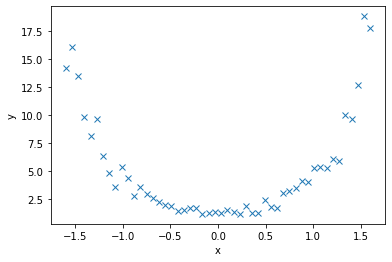

In [82]:
x = np.linspace(-1.6, 1.6, 50)
y = np.exp(x**2) * (1 + np.random.rand(*x.shape))

plt.plot(x, y, "x")
plt.xlabel("x")
plt.ylabel("y")

In [83]:
p = np.polyfit(x, np.log(y), deg=2)
p

array([1.02816891, 0.01813332, 0.34511819])

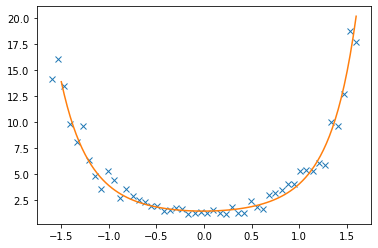

In [84]:
t = np.linspace(-1.5, 1.6, 100)

plt.plot(x, y, "x")
plt.plot(t, np.exp(np.polyval(p, t)), "-", label="exp(x**2)")


## Let's compare the performance of this model to a parabolic fit

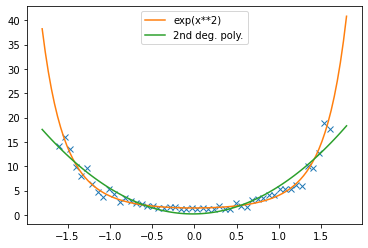

In [85]:
t = np.linspace(-1.8, 1.8, 100)

plt.plot(x, y, "x")
plt.plot(t, np.exp(np.polyval(p, t)), "-", label="exp(x**2)")
plt.plot(t, np.polyval(np.polyfit(x, y, deg=2), t), "-", label="2nd deg. poly.")

plt.legend()


Its not too easy to see which of the two performs better, is it? 


## Scatter plot
An interesting tool to look at the performance of a model is to do a scatter plot, where the model prediciton is plotted against the acatual data value. A perfect fit would yield values lying on a straight line. 



In [86]:
y_prediction_exp = np.exp(np.polyval(p, x))
y_prediction_poly = np.polyval(np.polyfit(x, y, deg=2), x)

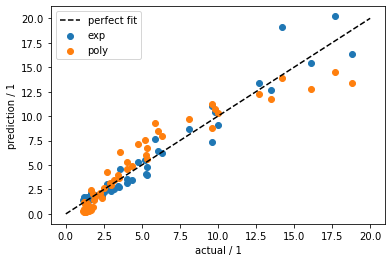

In [87]:
plt.scatter(y, y_prediction_exp, label="exp")
plt.scatter(y, y_prediction_poly, label="poly")

plt.plot([0.0, 20], [0, 20], "k--", label="perfect fit")

plt.ylabel("prediction / 1")
plt.xlabel("actual / 1")

plt.legend()

The exp fit's points lie much closer and also much more symmetric around the "perfect fit"-line, which may be a hint that the fit is superiour. 

## Error measures
The best input is probably going to come from some numbers. So let's calculate a few different errors for the models  and compare them.

### Mean absolute error

In [93]:
mae_exp = np.mean(np.abs(y - y_prediction_exp))
mae_poly = np.mean(np.abs(y - y_prediction_poly))

print(f"MAE for exp: {mae_exp:1.2f}")
print(f"MAE for poly: {mae_poly:1.2f}")

MAE for exp: 0.71
MAE for poly: 1.13


### Root mean square error

In [95]:
rmse_exp = np.sqrt(np.mean((y - y_prediction_exp)**2))
rmse_poly = np.sqrt(np.mean((y - y_prediction_poly)**2))

print(f"RMSE for exp: {rmse_exp:1.2f}")
print(f"RMSE for poly: {rmse_poly:1.2f}")

RMSE for exp: 1.10
RMSE for poly: 1.55


### Cross-validation
When fitting models [corrs-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is an important topic. There are greate helper functions for this and more useful error measures available in [scikit-learn](https://scikit-learn.org/stable/).

### Exercise
Look at the corona data for Austria in chapter 5. Take the data of the increasing flank of the second wave (e.g. from mid-August to mid-November, use everything until the peak) and fit an exponential curve to this data. Use the model to calculate when 100k cases would have been reached. 

For your convenience, the data concerning austria is saved to "data/ecdc_corona_austria.csv". Just open it using pandas a DataFrame.

# Optimization & root finding
Automatized optimisation is very practical if you can get it to work. A useful tool for this is [scipy's optimize module](https://docs.scipy.org/doc/scipy/reference/optimize.html). 

All you need to do is:
- define a model function (as python function)
- (define an initial guess, this is not always required)
- run a suitable optimizer from scipy.optimize.


At makes a lot of sense to read the documentation properly so I wont repeat it here. Pay special attention to [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize).
Methods for root findnig work in a similar manner and are also documented in the scipy.optimize main page.


In [1]:
import scipy.optimize as opt

## Example: Minimum of a 1D potential
Finding the minimum of a shifted parabola. $$f(x) = x^2 - 4x -1$$

In [13]:
# step 1: define model function
def model_function(x):
    return x**2 - 4*x - 1

# step 2: set an initial guess. 
#   For scalar functions this is a bracket, because 
#   brent's method is used in the background.
#   https://mathworld.wolfram.com/BrentsMethod.html
# 
#   The bracket [a, b, c] is 3 values a<b<c, 
#   which build a bracket around the minimum, 
#   i.e. f(a) > f(b), f(b) < f(c)
x0 = [-10, 0, 10]

# step 3: run a minimizer
res = opt.minimize_scalar(
    
    # note: the function itself is handed. 
    # It will be called by the optimizer
    fun=model_function, 
    bracket=x0,
    method="brent"
)

x_min = res.x

print(f"The minimum is: x = {x_min:1.2f}")

The minimum is: x = 2.00


In [12]:
# res contains some information on the minimation
res

     fun: -5.0
    nfev: 9
     nit: 5
 success: True
       x: 2.0

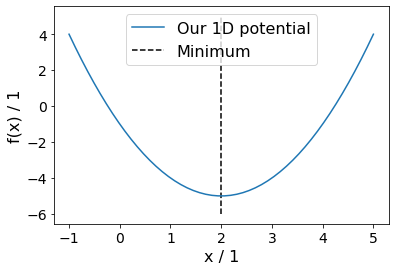

In [29]:
t = np.linspace(-1, 5, 50)

plt.plot(t, model_function(t), label="Our 1D potential")

# this creates a vertical line
plt.vlines(x_min, -6,  5,  label="Minimum", color="k", linestyle="dashed")

plt.legend(fontsize=16)
plt.ylabel("f(x) / 1", fontsize=16)
plt.xlabel("x / 1", fontsize=16)

plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Exercise:
Find the minimum of the [morse potential](https://de.wikipedia.org/wiki/Lennard-Jones-Potential) for any values of $\varepsilon$ and $\sigma$ of your choice. How are the values related to the minimum?

Tipp: define a model funciton that can take additional parameters and use the "args"-parameter in the funciton minize_scalar.

## Example: Minimum of a simple parabolic potential
Let the potential be of the following form $$V(x, y) = (x+y)^2 -3xy + 2 $$. Let's find its minimum.

#### Step 1: define the model function

In [62]:
def V(x, y):
    """This is the parabolic potential discussed above.
    
    It cannot be used as a model function yet, because its
    argument format is not suitable (takes 2 args for 
    the independent variables).
    """
    
    return (x + 2*y -1)**2 - 3*x*y + 2

Text(0, 0.5, 'y')

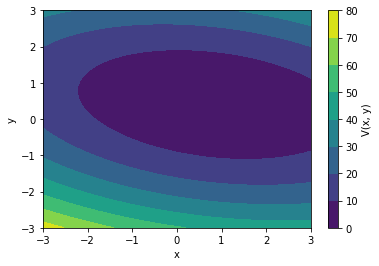

In [65]:
xx, yy = np.meshgrid(
    np.linspace(-3, 3, 50),
    np.linspace(-3, 3, 50)
)

plt.contourf(
    xx, 
    yy, 
    V(xx, yy)
)
cbar = plt.colorbar()
cbar.set_label("V(x, y)")
plt.xlabel("x")
plt.ylabel("y")

In order to use the potential as a model function, we will have to use a wrapper function. 

In [52]:
def model_function(r):
    """This is a wrapper for the 2D potential, so 
    it can be used with scipy.optimize.minimize.
    
    Unfortunately now if will only work with single/skalar values
    for x and y.
    
    Args:
        r: 2d iterable containing a value for x and a value for y.
    """
    
    x, y = r
    
    return V(x, y)

# let's see if it works
model_function((1, 2))

5

#### Step 2: define an initial guess

In [53]:
# based on looking at the plot and 
# the potential itself
x0 = (0, 0)

#### Step 3: run the minimizer 
Let's use a simple [conjugate gradient](https://en.wikipedia.org/wiki/Conjugate_gradient_method) based optimisation.

In [69]:
res = opt.minimize(
    fun=model_function,
    x0=x0,
    method="CG"
)

x_min = res.x

print(f"The minimum is at: {x_min}")

The minimum is at: [0.79999999 0.39999999]


#### (Step 4: test the result) 
Never trust the result! In 1D it's usually quite obvious if you found the value, but in higher dimensions some tests are usually not a bad idea.

In [71]:
# let's evaluate the funciton at the suposize minimum.
# (the star at the beginning unpacks the array)
V(*x_min)

1.4000000000000006

In [74]:
# did we find any lower value during printing the function before?
np.min(V(xx, yy))

1.4031653477717616

Aparently there are now lowervalues on our grid. A good sign. 
There may however be even better minima, outside of our search area. 
**Be mindful that the minimization algorithms will usually just find the local minimum closest to the initial guess.**

### Exercise:
Pick one of these [benchmark functions](https://en.wikipedia.org/wiki/Test_functions_for_optimization) and find its minimum.

# Fitting nonlinear model functions
If you ever need to fit non-linear models a good way to go is
- define a cost function for your model. This could e.g. be an error measure (e.g. RMSE). 
- Minimize the cost funciton of the space of possible model parameter values.

The minimation can be done using scipy.optimize (see above).

I will demonstrate this here for a simple polynomial fit.

In [135]:
# let's generate some data
x = np.linspace(-3, 3, 30)
y = 3*x**3 - 2*x**2 + 1*x + 0

# add a little noise, for the fun of it
y += np.random.rand(*y.shape) * 5

In [136]:
def polynomial(x, a, b, c, d):
    """this is our model. A 3rd degree polynomial.
    x is the independent variable. a-d are polynomial coefficients.
    """
    return a*x**3 + b*x**2 + c*x + d
    
def mse(x, y, a, b, c, d):
    """Mean square error for the data and our model."""
    # f(x)
    f = polynomial(x, a, b, c, d)
    
    return np.mean((f-y)**2)
    

def model_function(polynomial_coeffs, x, y):
    """This is the model function to be minimized later.
    It has to have a special form: the first argument must be 
    a point in the space in which we are minimizing (i.e. it 
    must be the polynomial coefficients packed into a vector),
    the second and following argument can be any additional parameters.
    We will use this to pass our x & y data to the error function. 
    """
    a, b, c, d = polynomial_coeffs
    
    return mse(x, y, a, b, c, d)

In [137]:
res = opt.minimize(
    fun=model_function,
    args=(x, y),
    
    # we will just start with all coeffs set to 1.
    x0=[1, 1, 1, 1]
)

coeffs_found = res.x

print(f"The following values for the coeffs. were found: \n{coeffs_found}")

The following values for the coeffs. were found: 
[ 2.88148344 -1.96472778  1.46925944  2.55742333]


These values are not perfekt, but if you consider that we added noise between (0,1) the error in the absolute term can be forgiven. $a$ and $b$ fit quite well, nevertheless.

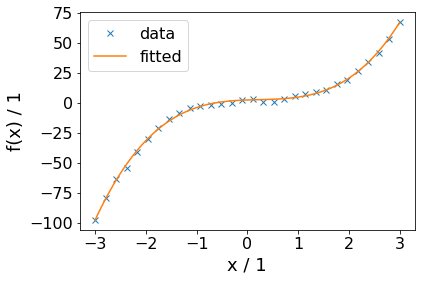

In [138]:
plt.plot(x, y, "x", label="data")

t = np.linspace(-3, 3, 100)
plt.plot(t, polynomial(t, *coeffs_found), "-", label="fitted") # the * unpacks the coeffs

# add some labels
plt.xlabel("x / 1", fontsize=18)
plt.ylabel("f(x) / 1", fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.legend(fontsize=16)

### Exercise:
Look again at the corona data for Austria in chapter 5. Take the data of the increasing flank of the second wave (e.g. from mid-August to mid-November, use everything until the peak) and fit an exponential curve to this data. *This time fit an exponential directly!* Use the model to calculate when 100k cases would have been reached. If you already tried the similar exercise above using polyfit, compare the results.

(For your convenience, the data concerning austria is saved to "data/ecdc_corona_austria.csv". Just open it using pandas a DataFrame.)

# Sklearn - Regression
[scikit-learn](https://scikit-learn.org/stable/) is an incredibly practical tool for rapid prototyping and trying out a few standard modelling methods. 

It has a detailed documentation that is rich in examples, which once again defeats the purpose of me repeating everything here. However for the fun of it, I will use sklearn to fit the polynomial funciton from above for a simple comparison of workflows.

In [139]:
# I hope you did not change the values from before
x.shape, y.shape

((30,), (30,))

We will use sklearns nice and practical linear models module. 
Its used to fit models of the following form:
$$y(w, x) = \sum_{i=0}^p w_i x_i, $$
where $w_i$ are weights/model parameters and $x_i$ are called features. This can be our independent variable(s) or functions of them. In case of our 1D polynomial, the features will be powers of x, i.e. $x_i \rightarrow x^i$. Usually $x_0$ is assumed to be $1$, thus yielding an offset.

The features and their values are usually written up in a matrix, called the design matrix 
$$X = [ x_0, x_1, ...]$$
(remember the $x_i$ actually represent vectors of values of the features.)

The sklearn functions usually take the design matrix $X$ and the target values $y$ as input.

In [140]:
# lets build the design matrix:
def make_design(x):
    X = np.array([
        np.ones_like(x), # x_0
        x,               # x_1
        x**2,            # x_2
        x**3             # x_3
    ])

    # the feature values should be the columns
    X = np.transpose(X)
    
    return X

X = make_design(x)
    
# shape should be: n_samples x n_features
X.shape

(30, 4)

In [141]:
from sklearn.linear_model import LinearRegression

# instantiate our regressor
# we use fit intercep=False, because our design matrix 
# already contains x_0, i.e. the intercept.
regressor = LinearRegression(fit_intercept=False)

In [142]:
# do the fit
regressor.fit(X, y)

LinearRegression(fit_intercept=False)

In [143]:
coeffs_found_sklearn = np.flip(regressor.coef_)
print(f"The following values for were found: \n{coeffs_found_sklearn}")

The following values for were found: 
[ 2.88148346 -1.96472776  1.46925916  2.55742326]


In [144]:
# let's look at the differences
coeffs_found-coeffs_found_sklearn

array([-1.79478588e-08, -2.20421050e-08,  2.87230794e-07,  6.54997185e-08])

The found coeffs are very, very close. Nice

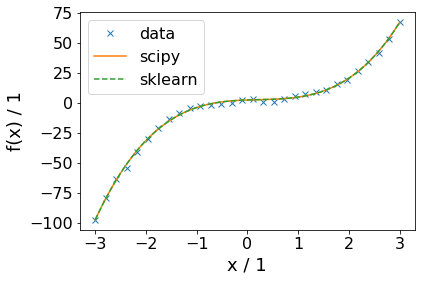

In [145]:
plt.plot(x, y, "x", label="data")

t = np.linspace(-3, 3, 100)
plt.plot(t, polynomial(t, *coeffs_found), "-", label="scipy") # the * unpacks the coeffs

plt.plot(t, regressor.predict(make_design(t)), "--", label="sklearn") # the * unpacks the coeffs

# add some labels
plt.xlabel("x / 1", fontsize=18)
plt.ylabel("f(x) / 1", fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.legend(fontsize=16)

### Exercise:
Use [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) to fit a degree 5 polynomial to the data from the example above. Watch what happens to the coefficients of the highest powers when alpha is increased/decreased.

## Helpers
A major power of scikit-learn is also their practical tools for dataset creation and preparation, model selection, evaluation and testing and their visualisation tools. If this is interesting to you please check them out in the [scikit-learn user guide](https://scikit-learn.org/stable/user_guide.html)!